In [26]:
import glob
from astropy.table import Table
import fitsio
import os
import matplotlib.pyplot as plt

In [34]:
fafns = sorted(glob.glob("/global/cfs/cdirs/desi/spectro/data/202304*/????????/fiberassign*fits.gz"))

In [ ]:
n_sky = []
expid = []
for fafn in fafns:
    d = Table(fitsio.read(fafn, "FIBERASSIGN"))
    sky_fibs = d["FIBER"][d["OBJTYPE"] == "SKY"]
    expid_str = fafn.split(os.path.sep)[-2]
    n_sky.append(len(sky_fibs))
    expid.append(int(expid_str))

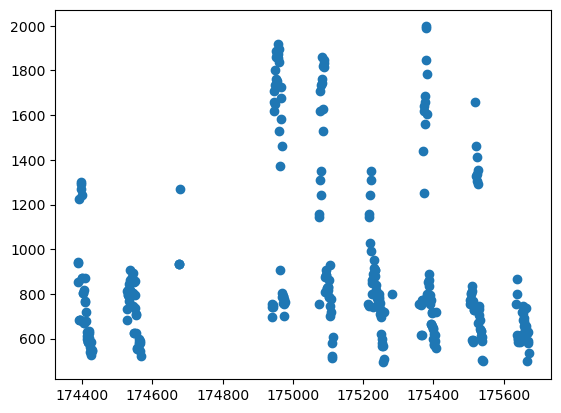

In [33]:
plt.scatter(expid, n_sky)